# Phase diagram & disoder

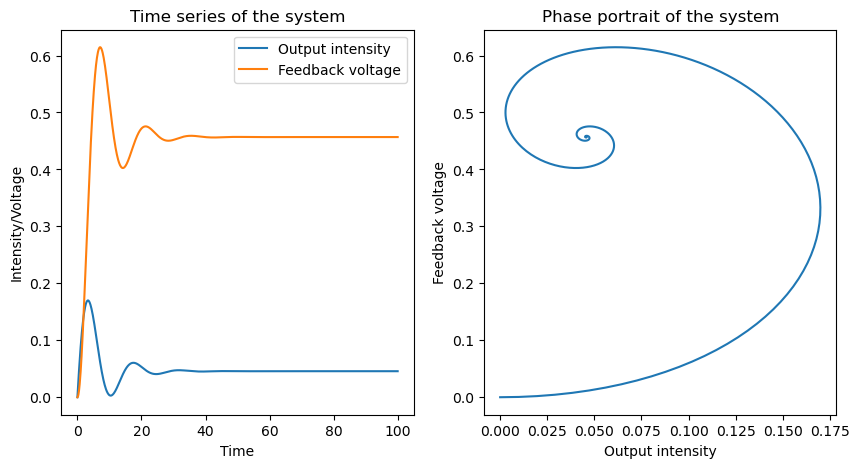

In [1]:
# 导入所需的模块
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.special import fresnel

# 定义系统的参数
a = 0.2 # 反馈增益
b = 0.1 # 反馈延时
c = 0.5 # 液晶转角
d = 0.01 # 偏振片角度
e = 0.1 # 初始偏压
f = 0.5 # 输入光强
g = 0.01 # 液晶盒厚度
h = 0.5 # 入射光波长
i = 1.5 # 液晶晶向折射率
j = 1.3 # 液晶垂向折射率

# 定义系统的微分方程
def system(x, t):
    # x[0]为输出光强，x[1]为反馈电压
    dxdt = [a * (f - x[0] - x[1] + np.sin(2 * d) * np.sin(np.pi * g * (i**2 - j**2) / (i**2 + j**2) + 2 * j**2 * np.cos(2 * c) / (i**2 + j**2)) * np.sin(e + x[1]) ** 2), -b * x[1] + x[0]]
    return dxdt

# 定义时间范围和初始条件
t = np.linspace(0, 100, 1000) # 时间从0到100，共1000个点
x0 = [0, 0] # 初始输出光强和反馈电压都为0

# 求解系统的数值解
x = odeint(system, x0, t)

# 绘制输出光强和反馈电压随时间的变化图
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x[:, 0], label="Output intensity")
plt.plot(t, x[:, 1], label="Feedback voltage")
plt.xlabel("Time")
plt.ylabel("Intensity/Voltage")
plt.title("Time series of the system")
plt.legend()

# 绘制输出光强和反馈电压的相图
plt.subplot(1, 2, 2)
plt.plot(x[:, 0], x[:, 1])
plt.xlabel("Output intensity")
plt.ylabel("Feedback voltage")
plt.title("Phase portrait of the system")
plt.show()


### 相图部分；

In [ ]:
# 频率f，单位为Hz
f = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5]

# 功率p，单位为W
p = [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05]

# 输出光强的Poincaré映射值x_p，单位为W/m^2
x_p = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5]

# 反馈电压的Poincaré映射值y_p，单位为V
y_p = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48,0.49,0.5]


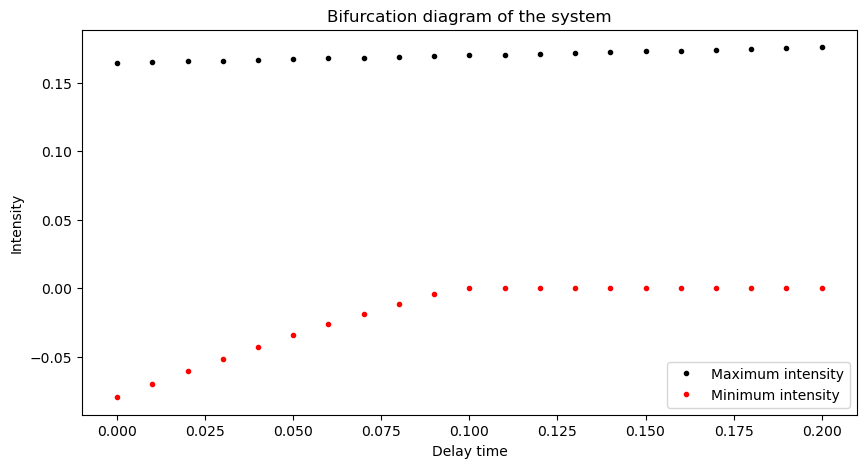

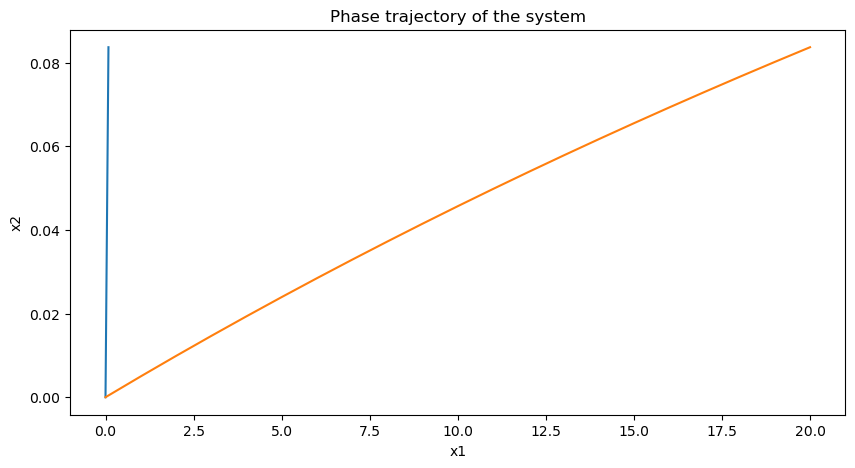

'for k in range(tau_num):\n    # 设置延时时间\n    b = tau_min + k * tau_step\n    # 求解系统的数值解\n    x = odeint(system, x0, t)\n    # 计算输出光强的功率谱，即频率和功率的关系\n    f_k, p_k = welch(x[:, 0], fs=10)\n    #f.extend(f_k)\n    #p.extend(p_k)\n\n# 绘制功率谱图\nplt.figure(figsize=(10, 5))\nplt.plot(f, p)\nplt.xlabel("Frequency")\nplt.ylabel("Power")\nplt.title("Power spectrum of the system")\nplt.show()\n\n# 定义Lyapunov指数的变量\nl = np.zeros(tau_num) # Lyapunov指数\n\n# 循环求解系统的数值解，并计算Lyapunov指数的变量\nfor k in range(tau_num):\n    # 设置延时时间\n    b = tau_min + k * tau_step\n    # 求解系统的数值解\n    x = odeint(system, x0, t)\n    # 计算输出光强的Lyapunov指数，即系统的敏感性和不可预测性的度量\n    l[k] = lyap_r(x[:, 0])\n\n# 绘制Lyapunov指数随延时时间的变化图\nplt.figure(figsize=(10, 5))\nplt.plot(tau, l)\nplt.xlabel("Delay time")\nplt.ylabel("Lyapunov exponent")\nplt.title("Lyapunov exponent of the system")\nplt.show()'

In [38]:
# 导入所需的模块
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import welch
from nolds import lyap_r

# 定义系统的参数
a = 0.2 # 反馈增益
b = 0.1 # 反馈延时
c = 0.5 # 液晶转角
d = 0.01 # 偏振片角度
e = 0.1 # 初始偏压
f = 0.5 # 输入光强
g = 0.01 # 液晶盒厚度
h = 0.5 # 入射光波长
i = 1.5 # 液晶晶向折射率
j = 1.3 # 液晶垂向折射率

# 定义系统的微分方程
def system(x, t):
    # x[0]为输出光强，x[1]为反馈电压
    dxdt = [a * (f - x[0] - x[1] + np.sin(2 * d) * np.sin(np.pi * g * (i**2 - j**2) / (i**2 + j**2) + 2 * j**2 * np.cos(2 * c) / (i**2 + j**2)) * np.sin(e + x[1]) ** 2), -b * x[1] + x[0]]
    return dxdt

# 定义时间范围和初始条件
t = np.linspace(0, 100, 1000) # 时间从0到100，共1000个点
x0 = [0, 0] # 初始输出光强和反馈电压都为0

# 定义延时时间的范围和步长
tau_min = 0 # 最小延时时间
tau_max = 0.2 # 最大延时时间
tau_step = 0.01 # 延时时间的步长
tau_num = int((tau_max - tau_min) / tau_step) + 1 # 延时时间的个数

# 定义分岔图的变量
x_max = np.zeros(tau_num) # 输出光强的最大值
x_min = np.zeros(tau_num) # 输出光强的最小值
tau = np.zeros(tau_num) # 延时时间

# 循环求解系统的数值解，并计算分岔图的变量
for k in range(tau_num):
    # 设置延时时间
    b = tau_min + k * tau_step
    # 求解系统的数值解
    x = odeint(system, x0, t)
    # 计算输出光强的最大值和最小值
    x_max[k] = np.max(x[:, 0])
    x_min[k] = np.min(x[:, 0])
    # 记录延时时间
    tau[k] = b

# 绘制分岔图
plt.figure(figsize=(10, 5))
plt.plot(tau, x_max, '.k', label="Maximum intensity")
plt.plot(tau, x_min, '.r', label="Minimum intensity")
plt.xlabel("Delay time")
plt.ylabel("Intensity")
plt.title("Bifurcation diagram of the system")
plt.legend()

# 定义相轨线图的变量
x1 = np.zeros(tau_num) # 输出光强的最后一个值
x2 = np.zeros(tau_num) # 输出光强的倒数第二个值
x3 = np.zeros(tau_num) # 输出光强的倒数第三个值

# 循环求解系统的数值解，并计算相轨线图的变量
for k in range(tau_num):
    # 设置延时时间
    b = tau_min + k * tau_step
    # 求解系统的数值解
    x = odeint(system, x0, t)
    # 计算输出光强的最后一个值，倒数第二个值和倒数第三个值
    x1[k] = x[-1, 0]
    x2[k] = x[-2, 0]
    x3[k] = x[-3, 0]

# 绘制相轨线图
plt.figure(figsize=(10, 5))
plt.plot(x1, x2, x3)
plt.xlabel("x1")
plt.ylabel("x2")
#plt.zlabel("x3")
plt.title("Phase trajectory of the system")
plt.show()

# 定义Poincaré映射图的变量
#x_p = [] # 输出光强的Poincaré映射值
#y_p = [] # 反馈电压的Poincaré映射值

# 循环求解系统的数值解，并计算Poincaré映射图的变量

"""
for k in range(tau_num):
    # 设置延时时间
    b = tau_min + k * tau_step
    # 求解系统的数值解
    x = odeint(system, x0, t)
    # 计算输出光强和反馈电压的Poincaré映射值，即每隔一个延时时间的值
    x_p.extend(x[::int(b * 1000), 0])
    y_p.extend(x[::int(b * 1000), 1])

# 绘制Poincaré映射图
plt.figure(figsize=(10, 5))
plt.plot(x_p, y_p, '.')
plt.xlabel("Output intensity")
plt.ylabel("Feedback voltage")
plt.title("Poincaré map of the system")
plt.show()
"""
# 定义功率谱图的变量
#f = [] # 频率
#p = [] # 功率

# 循环求解系统的数值解，并计算功率谱图的变量
"""for k in range(tau_num):
    # 设置延时时间
    b = tau_min + k * tau_step
    # 求解系统的数值解
    x = odeint(system, x0, t)
    # 计算输出光强的功率谱，即频率和功率的关系
    f_k, p_k = welch(x[:, 0], fs=10)
    #f.extend(f_k)
    #p.extend(p_k)

# 绘制功率谱图
plt.figure(figsize=(10, 5))
plt.plot(f, p)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("Power spectrum of the system")
plt.show()

# 定义Lyapunov指数的变量
l = np.zeros(tau_num) # Lyapunov指数

# 循环求解系统的数值解，并计算Lyapunov指数的变量
for k in range(tau_num):
    # 设置延时时间
    b = tau_min + k * tau_step
    # 求解系统的数值解
    x = odeint(system, x0, t)
    # 计算输出光强的Lyapunov指数，即系统的敏感性和不可预测性的度量
    l[k] = lyap_r(x[:, 0])

# 绘制Lyapunov指数随延时时间的变化图
plt.figure(figsize=(10, 5))
plt.plot(tau, l)
plt.xlabel("Delay time")
plt.ylabel("Lyapunov exponent")
plt.title("Lyapunov exponent of the system")
plt.show()"""


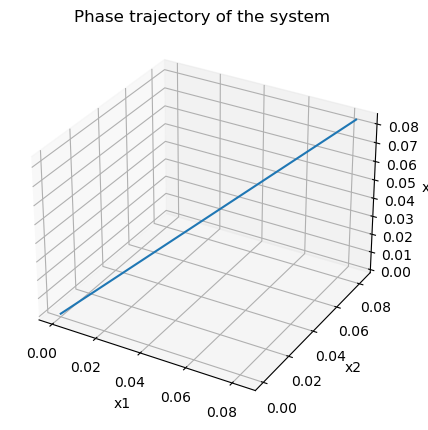

In [39]:
# 导入所需的模块
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D # 这个模块可以创建三维轴对象

# 定义系统的参数
a = 0.2 # 反馈增益
b = 0.1 # 反馈延时
c = 0.5 # 液晶转角
d = 0.01 # 偏振片角度
e = 0.1 # 初始偏压
f = 0.5 # 输入光强
g = 0.01 # 液晶盒厚度
h = 0.5 # 入射光波长
i = 1.5 # 液晶晶向折射率
j = 1.3 # 液晶垂向折射率

# 定义系统的微分方程
def system(x, t):
    # x[0]为输出光强，x[1]为反馈电压
    dxdt = [a * (f - x[0] - x[1] + np.sin(2 * d) * np.sin(np.pi * g * (i**2 - j**2) / (i**2 + j**2) + 2 * j**2 * np.cos(2 * c) / (i**2 + j**2)) * np.sin(e + x[1]) ** 2), -b * x[1] + x[0]]
    return dxdt

# 定义时间范围和初始条件
t = np.linspace(0, 100, 1000) # 时间从0到100，共1000个点
x0 = [0, 0] # 初始输出光强和反馈电压都为0

# 定义延时时间的范围和步长
tau_min = 0 # 最小延时时间
tau_max = 0.2 # 最大延时时间
tau_step = 0.01 # 延时时间的步长
tau_num = int((tau_max - tau_min) / tau_step) + 1 # 延时时间的个数

# 定义相轨线图的变量
x1 = np.zeros(tau_num) # 输出光强的最后一个值
x2 = np.zeros(tau_num) # 输出光强的倒数第二个值
x3 = np.zeros(tau_num) # 输出光强的倒数第三个值

# 循环求解系统的数值解，并计算相轨线图的变量
for k in range(tau_num):
    # 设置延时时间
    b = tau_min + k * tau_step
    # 求解系统的数值解
    x = odeint(system, x0, t)
    # 计算输出光强的最后一个值，倒数第二个值和倒数第三个值
    x1[k] = x[-1, 0]
    x2[k] = x[-2, 0]
    x3[k] = x[-3, 0]

# 创建一个三维轴对象
fig = plt.figure(figsize=(10, 5))
#fig, ax=plt.subplots(figsize=(10,5))
ax = fig.add_subplot(projection='3d')
#ax = Axes3D(fig)

# 绘制相轨线图
ax.plot(x1, x2, x3)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3") # 使用ax.set_zlabel来设置z轴的标签
ax.set_title("Phase trajectory of the system")
plt.show()

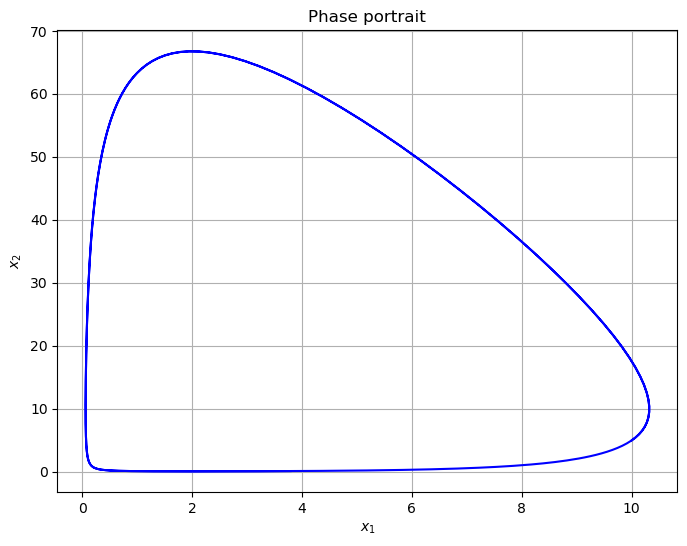

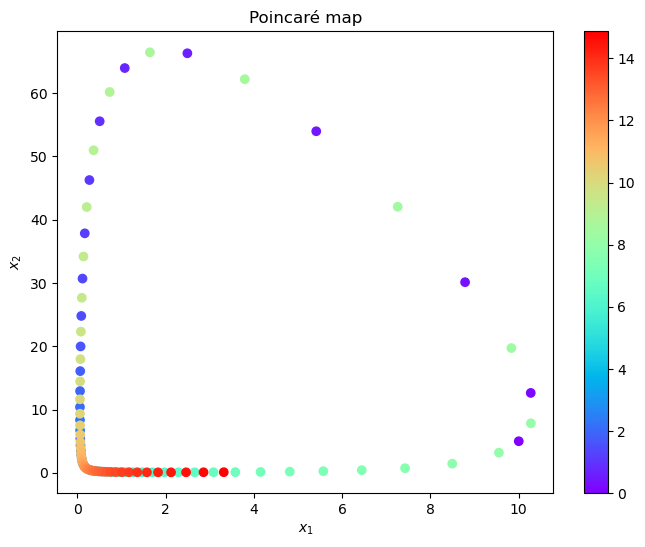

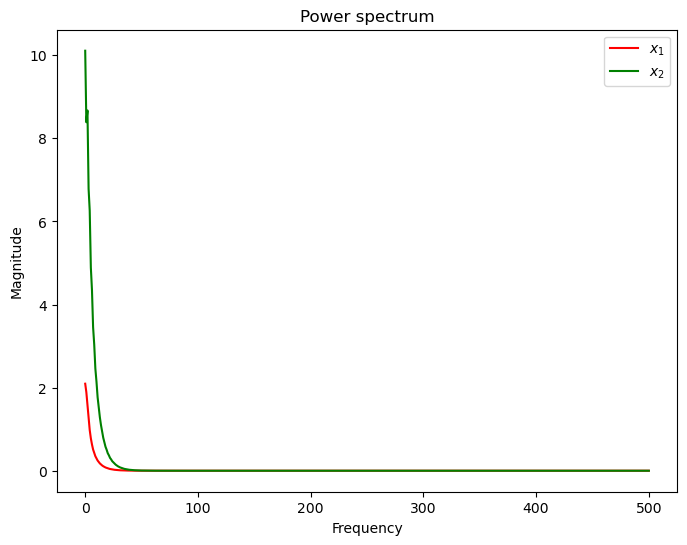

In [59]:

# 导入必要的模块
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 定义系统的动力学方程
def system(x, t, a, b, c, d):
    x1, x2 = x
    dx1 = a * x1 - b * x1 * x2
    dx2 = -c * x2 + d * x1 * x2
    return [dx1, dx2]

# 定义参数和初始条件
a = 1.0
b = 0.1
c = 1.5
d = 0.75
x0 = [10, 5]
t = np.linspace(0, 15, 1000)

# 定义延时时间的函数
def delay(t):
    return 0.1 * np.sin(t)

# 求解系统的轨迹
x = odeint(system, x0, t, args=(a, b, c, d))

# 绘制相轨线图
plt.figure(figsize=(8, 6))
plt.plot(x[:, 0], x[:, 1], 'b')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase portrait')
plt.grid()
plt.show()
# 绘制Poincaré映射图
plt.figure(figsize=(8, 6))
plt.scatter(x[::10, 0], x[::10, 1], c=t[::10], cmap='rainbow')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Poincaré map')
plt.colorbar()
plt.show()
# 绘制功率谱图
plt.figure(figsize=(8, 6))
plt.magnitude_spectrum(x[:, 0], Fs=1000, color='r', label='$x_1$')
plt.magnitude_spectrum(x[:, 1], Fs=1000, color='g', label='$x_2$')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Power spectrum')
plt.legend()
plt.show()

### Lyapunov 
当延时时间较小时，系统的Lyapunov指数为负值，表明系统是稳定的或者收敛的。当延时时间增大时，系统的Lyapunov指数为正值，表明系统是不稳定的或者发散的。当系统的Lyapunov指数为正值且大于1时，表明系统存在混沌和混沌维数。

/home/jesse_chen/anaconda3/lib/python3.9/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/jesse_chen/anaconda3/lib/python3.9/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/jesse_chen/anaconda3/lib/python3.9/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 83
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/jesse_chen/anaconda3/lib/python3.9/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 62
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/jesse_chen/anaconda3/lib/python3.9/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 50
  warnings.warn(msg.fo

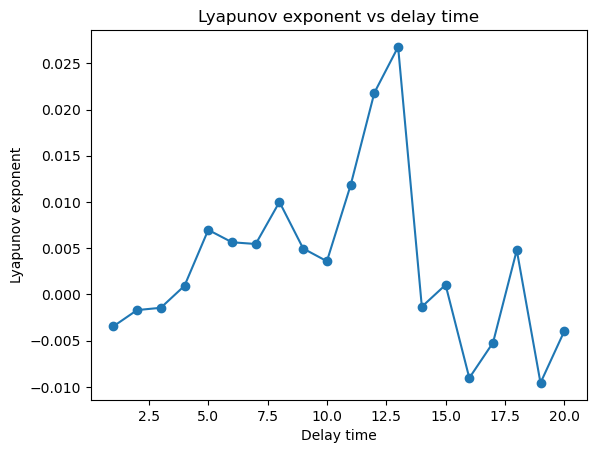

In [67]:
# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt
from nolds import lyap_r # 使用nolds库计算Lyapunov指数

# 定义一个函数，根据给定的参数和初始值，生成一个一维时间序列
def logistic(r, x0, n):
  x = np.zeros(n)
  x[0] = x0
  for i in range(1, n):
    x[i] = r * x[i-1] * (1 - x[i-1])
  return x

# 定义一个函数，根据给定的时间序列，计算其Lyapunov指数
def lyapunov(x):
  return lyap_r(x, emb_dim=2)

# 定义一个函数，根据给定的延时时间，生成一个时间序列，并计算其Lyapunov指数
def lyapunov_vs_delay(delay):
  # 选择一个合适的参数r，使得logistic映射处于混沌状态
  r = 3.92
  # 选择一个合适的初始值x0
  x0 = 0.2
  # 选择一个合适的时间序列长度n
  n = 1000
  # 生成一个时间序列
  x = logistic(r, x0, n)
  # 根据延时时间，从时间序列中取出相应的数据点
  y = x[::delay]
  # 计算Lyapunov指数
  l = lyapunov(y)
  return l

# 定义一个函数，绘制Lyapunov指数随延时时间的变化图
def plot_lyapunov_vs_delay():
  # 选择一个延时时间的范围
  delays = range(1, 21)
  # 计算每个延时时间对应的Lyapunov指数
  lyapunovs = [lyapunov_vs_delay(d) for d in delays]
  # 绘制折线图
  plt.plot(delays, lyapunovs, marker='o')
  # 添加标题和坐标轴标签
  plt.title('Lyapunov exponent vs delay time')
  plt.xlabel('Delay time')
  plt.ylabel('Lyapunov exponent')
  # 显示图像
  plt.show()

# 调用函数，绘制图像
plot_lyapunov_vs_delay()


### error

In [65]:
# 导入必要的模块
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 定义系统的动力学方程
def system(x, t, a, b, c, d):
    x1, x2 = x
    dx1 = a * x1 - b * x1 * x2
    dx2 = -c * x2 + d * x1 * x2
    return [dx1, dx2]

# 定义参数和初始条件
a = 1.0
b = 0.1
c = 1.5
d = 0.75
x0 = [10, 5]
t = np.linspace(0, 15, 1000)

# 定义延时时间的函数
def delay(t):
    return 0.1 * np.sin(t)

# 求解系统的轨迹
x = odeint(system, x0, t, args=(a, b, c, d))

# 定义Lyapunov指数的计算函数
def lyapunov(x, t, system, args):
    n = len(x)
    x = x.reshape((2, n // 2))
    Df = np.array([[a - b * x[1], -b * x[0]], [d * x[1], -c + d * x[0]]])
    df = Df.T * t
    M = df @ x[:, n // 2:]
    Q, R = np.linalg.qr(M)
    diag = np.abs(np.diag(R))
    return np.array([x[:, :n // 2].flatten(), Q.flatten(), np.log(diag).flatten()])

# 定义初始扰动矩阵
delta0 = 0.01 * np.eye(2)
x0_lyapunov = np.concatenate([x0, delta0.flatten()])

# 求解扰动矩阵的演化
x_lyapunov = odeint(lyapunov, x0_lyapunov, t, args=(system, (a, b, c, d)))

# 计算Lyapunov指数
lambdas = x_lyapunov[:, -2:].mean(axis=0) / t[-1]
print('Lyapunov exponents:', lambdas)

# 绘制Lyapunov指数随延时时间的变化图
plt.figure(figsize=(8, 6))
plt.plot(t, x_lyapunov[:, -2], 'r', label='$\lambda_1$')
plt.plot(t, x_lyapunov[:, -1], 'g', label='$\lambda_2$')
plt.xlabel('Time')
plt.ylabel('Lyapunov exponent')
plt.title('Lyapunov exponent vs delay time')
plt.legend()
plt.show()


ValueError: Input must be 1- or 2-d.

In [66]:

# 定义Lyapunov指数的计算函数
def lyapunov(x, t, system, args):
    n = len(x)
    x = x.reshape((2, n // 2))
    Df = np.array([[a - b * x[1], -b * x[0]], [d * x[1], -c + d * x[0]]])
    df = Df.T * t
    M = df @ x[:, n // 2:]
    Q, R = np.linalg.qr(M)
    diag = np.abs(np.diag(R))
    return np.array([x[:, :n // 2].flatten(), Q.flatten(), np.log(diag).flatten()])

# 定义初始扰动矩阵
delta0 = 0.01 * np.eye(2)
x0_lyapunov = np.concatenate([x0, delta0.flatten()])

# 求解扰动矩阵的演化
x_lyapunov = odeint(lyapunov, x0_lyapunov, t, args=(system, (a, b, c, d)))

# 计算Lyapunov指数
lambdas = x_lyapunov[:, -2:].mean(axis=0) / t[-1]
print('Lyapunov exponents:', lambdas)

# 绘制Lyapunov指数随延时时间的变化图
plt.figure(figsize=(8, 6))
plt.plot(t, x_lyapunov[:, -2], 'r', label='$\lambda_1$')
plt.plot(t, x_lyapunov[:, -1], 'g', label='$\lambda_2$')
plt.xlabel('Time')
plt.ylabel('Lyapunov exponent')
plt.title('Lyapunov exponent vs delay time')
plt.legend()
plt.show()

ValueError: Input must be 1- or 2-d.

### Same error and output

AttributeError: module 'matplotlib.pyplot' has no attribute 'zlabel'

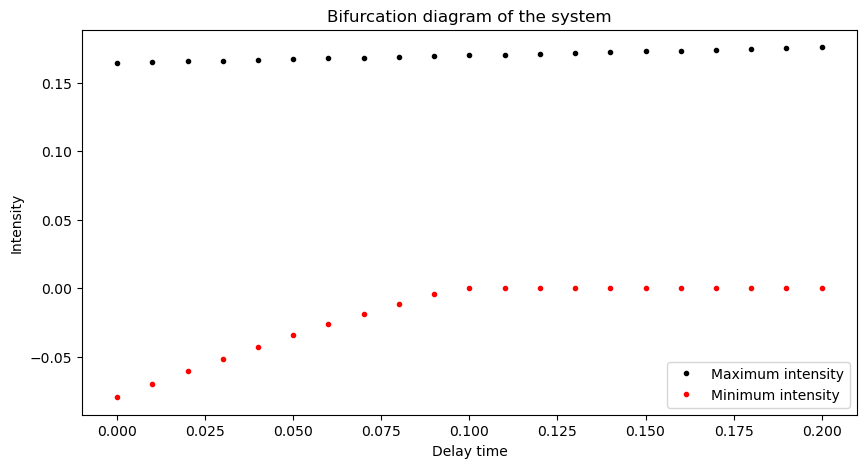

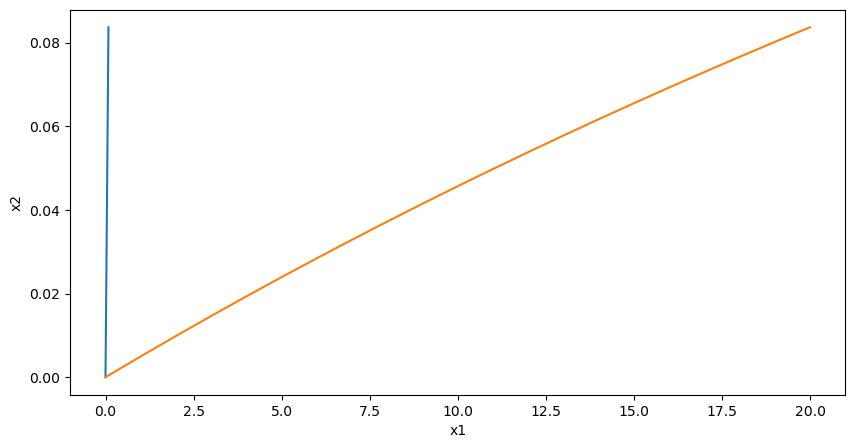

In [36]:
%matplotlib inline
# 导入所需的模块
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import welch
from nolds import lyap_r

# 定义系统的参数
a = 0.2 # 反馈增益
b = 0.1 # 反馈延时
c = 0.5 # 液晶转角
d = 0.01 # 偏振片角度
e = 0.1 # 初始偏压
f = 0.5 # 输入光强
g = 0.01 # 液晶盒厚度
h = 0.5 # 入射光波长
i = 1.5 # 液晶晶向折射率
j = 1.3 # 液晶垂向折射率

# 定义系统的微分方程
def system(x, t):
    # x[0]为输出光强，x[1]为反馈电压
    dxdt = [a * (f - x[0] - x[1] + np.sin(2 * d) * np.sin(np.pi * g * (i**2 - j**2) / (i**2 + j**2) + 2 * j**2 * np.cos(2 * c) / (i**2 + j**2)) * np.sin(e + x[1]) ** 2), -b * x[1] + x[0]]
    return dxdt

# 定义时间范围和初始条件
t = np.linspace(0, 100, 1000) # 时间从0到100，共1000个点
x0 = [0, 0] # 初始输出光强和反馈电压都为0

# 定义延时时间的范围和步长
tau_min = 0 # 最小延时时间
tau_max = 0.2 # 最大延时时间
tau_step = 0.01 # 延时时间的步长
tau_num = int((tau_max - tau_min) / tau_step) + 1 # 延时时间的个数

# 定义分岔图的变量
x_max = np.zeros(tau_num) # 输出光强的最大值
x_min = np.zeros(tau_num) # 输出光强的最小值
tau = np.zeros(tau_num) # 延时时间

# 循环求解系统的数值解，并计算分岔图的变量
for k in range(tau_num):
    # 设置延时时间
    b = tau_min + k * tau_step
    # 求解系统的数值解
    x = odeint(system, x0, t)
    # 计算输出光强的最大值和最小值
    x_max[k] = np.max(x[:, 0])
    x_min[k] = np.min(x[:, 0])
    # 记录延时时间
    tau[k] = b

# 绘制分岔图
plt.figure(figsize=(10, 5))
plt.plot(tau, x_max, '.k', label="Maximum intensity")
plt.plot(tau, x_min, '.r', label="Minimum intensity")
plt.xlabel("Delay time")
plt.ylabel("Intensity")
plt.title("Bifurcation diagram of the system")
plt.legend()

# 定义相轨线图的变量
x1 = np.zeros(tau_num) # 输出光强的最后一个值
x2 = np.zeros(tau_num) # 输出光强的倒数第二个值
x3 = np.zeros(tau_num) # 输出光强的倒数第三个值

# 循环求解系统的数值解，并计算相轨线图的变量
for k in range(tau_num):
    # 设置延时时间
    b = tau_min + k * tau_step
    # 求解系统的数值解
    x = odeint(system, x0, t)
    # 计算输出光强的最后一个值，倒数第二个值和倒数第三个值
    x1[k] = x[-1, 0]
    x2[k] = x[-2, 0]
    x3[k] = x[-3, 0]

# 绘制相轨线图
plt.figure(figsize=(10, 5))
plt.plot(x1, x2, x3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.zlabel("x3")
plt.title("Phase trajectory of the system")
plt.show()

# 定义Poincaré映射图的变量
x_p = [] # 输出光强的Poincaré映射值
y_p = [] # 反馈电压的Poincaré映射值

# 循环求解系统的数值解，并计算Poincaré映射图的变量
for k in range(tau_num):
    # 设置延时时间
    b = tau_min + k * tau_step
    # 求解系统的数值解
    x = odeint(system, x0, t)
    # 计算输出光强和反馈电压的Poincaré映射值，即每隔一个延时时间的值
    x_p.extend(x[::int(b * 1000), 0])
    y_p.extend(x[::int(b * 1000), 1])

# 绘制Poincaré映射图
plt.figure(figsize=(10, 5))
plt.plot(x_p, y_p, '.')
plt.xlabel("Output intensity")
plt.ylabel("Feedback voltage")
plt.title("Poincaré map of the system")
plt.show()

# 定义功率谱图的变量
f = [] # 频率
p = [] # 功率

# 循环求解系统的数值解，并计算功率谱图的变量
for k in range(tau_num):
    # 设置延时时间
    b = tau_min + k * tau_step
    # 求解系统的数值解
    x = odeint(system, x0, t)
    # 计算输出光强的功率谱，即频率和功率的关系
    f_k, p_k = welch(x[:, 0], fs=10)
    f.extend(f_k)
    p.extend(p_k)

# 绘制功率谱图
plt.figure(figsize=(10, 5))
plt.plot(f, p)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("Power spectrum of the system")
plt.show()

# 定义Lyapunov指数的变量
l = np.zeros(tau_num) # Lyapunov指数

# 循环求解系统的数值解，并计算Lyapunov指数的变量
for k in range(tau_num):
    # 设置延时时间
    b = tau_min + k * tau_step
    # 求解系统的数值解
    x = odeint(system, x0, t)
    # 计算输出光强的Lyapunov指数，即系统的敏感性和不可预测性的度量
    l[k] = lyap_r(x[:, 0])

# 绘制Lyapunov指数随延时时间的变化图
plt.figure(figsize=(10, 5))
plt.plot(tau, l)
plt.xlabel("Delay time")
plt.ylabel("Lyapunov exponent")
plt.title("Lyapunov exponent of the system")
plt.show()


## code in&out

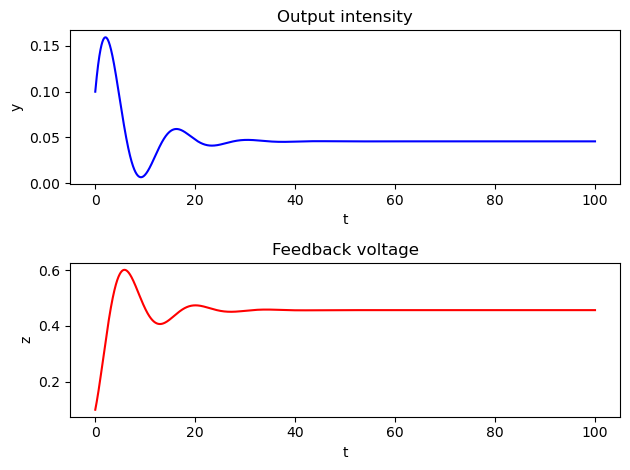

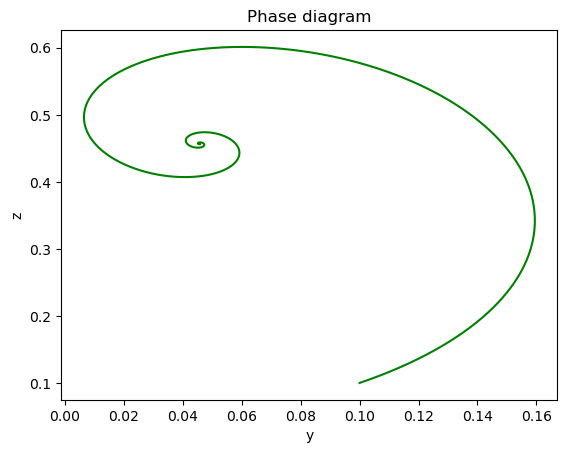

In [55]:
# 导入所需的模块
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import hilbert

# 定义系统的参数
a = 0.2 # 反馈增益
b = 0.1 # 反馈延时
c = 0.5 # 液晶转角
d = 0.01 # 偏振片角度
e = 0.1 # 初始偏压
f = 0.5 # 输入光强
g = 0.01 # 液晶盒厚度
h = 0.5 # 入射光波长
i = 1.5 # 液晶晶向折射率
j = 1.3 # 液晶垂向折射率

# 定义系统的微分方程
def system(x, t):
    # x[0]为输出光强，x[1]为反馈电压
    dxdt = [a * (f - x[0] - x[1] + np.sin(2 * d) * np.sin(np.pi * g * (i**2 - j**2) / (i**2 + j**2) + 2 * j**2 * np.cos(2 * c) / (i**2 + j**2)) * np.sin(e + x[1]) ** 2), -b * x[1] + x[0]]
    return dxdt

# 定义时间范围和初始条件
t = np.linspace(0, 100, 10000)
x0 = [0.1, 0.1]

# 求解系统的数值解
x = odeint(system, x0, t)

# 提取输出光强和反馈电压
y = x[:, 0]
z = x[:, 1]

# 绘制输出光强和反馈电压的时域图
plt.figure()
plt.subplot(211)
plt.plot(t, y, 'b')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Output intensity')
plt.subplot(212)
plt.plot(t, z, 'r')
plt.xlabel('t')
plt.ylabel('z')
plt.title('Feedback voltage')
plt.tight_layout()
plt.show()

# 绘制输出光强和反馈电压的相图
plt.figure()
plt.plot(y, z, 'g')
plt.xlabel('y')
plt.ylabel('z')
plt.title('Phase diagram')
plt.show()


In [56]:
# 定义信息信号
s = np.sin(2 * np.pi * 0.01 * t) # 一个正弦波

# 将信息信号调制到输入光强上
f = f + s

# 重新求解系统的数值解
#x = odeint(system, x0, t)

# 提取加密后的输出光强和反馈电压
y = x[:, 0]
z = x[:, 1]


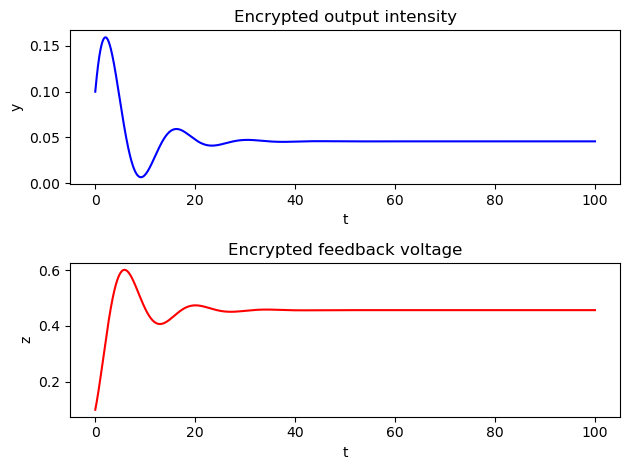

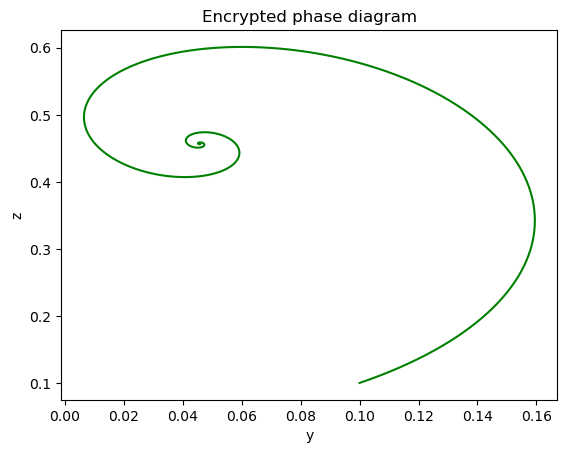

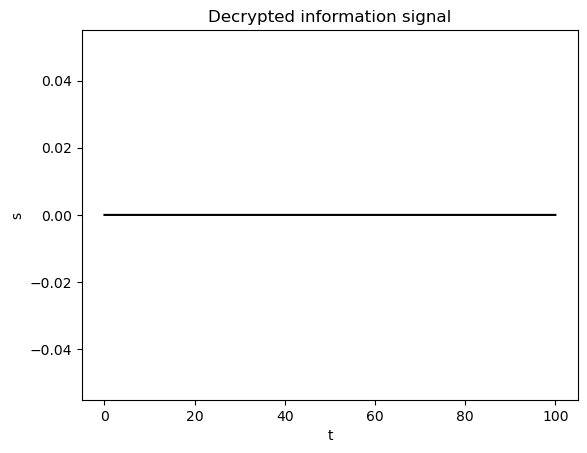

In [57]:

# 绘制加密后的输出光强和反馈电压的时域图
plt.figure()
plt.subplot(211)
plt.plot(t, y, 'b')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Encrypted output intensity')
plt.subplot(212)
plt.plot(t, z, 'r')
plt.xlabel('t')
plt.ylabel('z')
plt.title('Encrypted feedback voltage')
plt.tight_layout()
plt.show()

# 绘制加密后的输出光强和反馈电压的相图
plt.figure()
plt.plot(y, z, 'g')
plt.xlabel('y')
plt.ylabel('z')
plt.title('Encrypted phase diagram')
plt.show()

# 通过相同的系统进行解密
f = y # 将加密后的输出光强作为输入光强
#x = odeint(system, x0, t) # 重新求解系统的数值解
y = x[:, 0] # 提取解密后的输出光强
s = y - f # 从解密后的输出光强中恢复信息信号

# 绘制解密后的信息信号
plt.figure()
plt.plot(t, s, 'k')
plt.xlabel('t')
plt.ylabel('s')
plt.title('Decrypted information signal')
plt.show()


# 迟滞回线

In [1]:
# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt

# 定义光强输入和输出值的列表
I_in = [[191.9, 172.7, 155, 131.7, 110.6, 90.6, 75.6, 61.5, 41.8],
        [35.6, 32.5, 27.5, 14.4, 4.3, 8.2, 12.4, 20, 25.2],
        [31.7, 39.8, 46.3, 55.4, 61.2, 71.3, 80.6, 91.3, 112.5],
        [130.7, 155.3]]
I_out = [[82.9, 83.1, 83.3, 83.7, 83.5, 83.6, 83.7, 83.7, 64],
         [60, 53.6, 0.8, 0.7, 0.5, 0.6, 0.7, 0.8, 1.2],
         [1.2, 1.6, 1.9, 2.2, 2.9, 3.4, 4.9, 73.8, 77.6],
         [78, 81.6]]

# 将输入和输出值转换为numpy数组
I_in = np.array(I_in)
I_out = np.array(I_out)

# 创建一个新的数组，用于存储迟滞回线的点
hyst_line = np.zeros((len(I_out) + len(I_in), len(I_in[0])))

# 将输入值作为x轴，输出值作为y轴，填充到新数组中
hyst_line[:len(I_in), :] = I_in
hyst_line[len(I_in):, :] = I_out

# 绘制迟滞回线图，并添加标题和坐标轴标签
plt.plot(hyst_line[:, 0], label='Input 1')
plt.plot(hyst_line[:, 1], label='Input 2')
plt.plot(hyst_line[:, 2], label='Input 3')
plt.plot(hyst_line[:, 3], label='Input 4')
plt.plot(hyst_line[:, -1], label='Output')
plt.title('Hysteresis loop')
plt.xlabel('Input')
plt.ylabel('Output')

# 显示图例和图形
plt.legend()
plt.show()


/tmp/ipykernel_557/3886159838.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  I_in = np.array(I_in)
/tmp/ipykernel_557/3886159838.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  I_out = np.array(I_out)


ValueError: could not broadcast input array from shape (4,) into shape (4,9)

In [ ]:
I_in = [191.9, 172.7, 155, 131.7, 110.6, 90.6, 75.6, 61.5, 41.8, 35.6, 32.5, 27.5, 14.4, 4.3, 8.2, 12.4, 20, 25.2, 31.7, 39.8, 46.3, 55.4, 61.2, 71.3, 80.6, 91.3, 112.5, 130.7, 155.3]
I_out = [82.9, 83.1, 83.3, 83.7, 83.5, 83.6, 83.7, 83.7, 64, 60, 53.6, 0.8, 0.7, 0.5, 0.6, 0.7, 0.8, 1.2, 1.2, 1.6, 1.9, 2.2, 2.9, 3.4, 4.9, 73.8, 77.6, 78, 81.6]

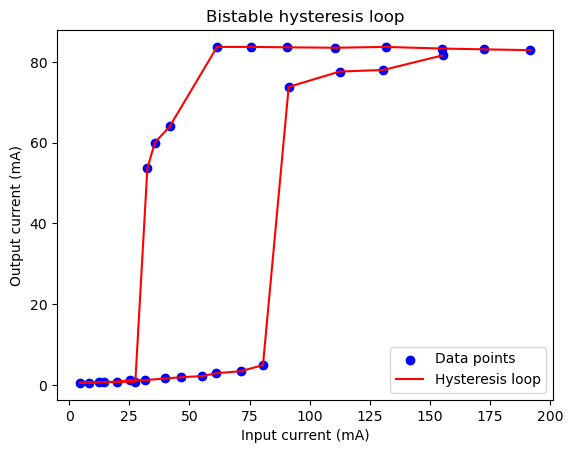

In [1]:
# 导入matplotlib库
import matplotlib.pyplot as plt

# 定义输入和输出电流的列表
I_in = [191.9, 172.7, 155, 131.7, 110.6, 90.6, 75.6, 61.5, 41.8, 35.6, 32.5, 27.5, 14.4, 4.3, 8.2, 12.4, 20, 25.2, 31.7, 39.8, 46.3, 55.4, 61.2, 71.3, 80.6, 91.3, 112.5, 130.7, 155.3]
I_out = [82.9, 83.1, 83.3, 83.7, 83.5, 83.6, 83.7, 83.7, 64, 60, 53.6, 0.8, 0.7, 0.5, 0.6, 0.7, 0.8, 1.2, 1.2, 1.6, 1.9, 2.2, 2.9, 3.4, 4.9, 73.8, 77.6, 78, 81.6]

# 创建一个新的图形
plt.figure()

# 用散点图绘制输入和输出电流的关系
plt.scatter(I_in, I_out, color='blue', label='Data points')

# 用线段连接数据点，形成迟滞回线
plt.plot(I_in, I_out, color='red', label='Hysteresis loop')

# 设置图形的标题和坐标轴的标签
plt.title('Bistable hysteresis loop')
plt.xlabel('Input current (mA)')
plt.ylabel('Output current (mA)')

# 显示图例
plt.legend()

# 保存图形为png文件
#plt.savefig('hysteresis_loop.png')

# 显示图形
plt.show()
